<a href="https://colab.research.google.com/github/Heavymetal17/inter-hall-data-analytics/blob/main/Inter_hall_Data_analytics_Model_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data=pd.read_csv('Train_data.xlsx - Final.csv')
dataexcel=pd.read_excel("Train_data.xlsx")
data

,Warehouse id,Region,SKU id,Apr-18,May-18,Jun-18,Jul-18,Aug-18,Sep-18,Oct-18,...,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21
0,Wh-1,NORTH,SKU-1,27,13,30,14,22,8,8,...,12,8,8,8,8,8,14,16,8,12
1,Wh-1,NORTH,SKU-2,88,28,127,130,58,10,7,...,16,7,7,7,7,7,13,43,13,43
2,Wh-1,NORTH,SKU-3,6,6,6,6,6,6,6,...,8,6,6,6,6,6,6,8,26,6
3,Wh-1,NORTH,SKU-4,162,184,110,172,90,40,18,...,82,78,38,18,22,28,36,352,58,18
4,Wh-1,NORTH,SKU-5,171,402,627,615,300,417,141,...,468,216,75,6,30,66,141,699,183,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,Wh-4,SOUTH,SKU-229,7,7,7,7,7,7,7,...,591,167,455,215,135,239,295,7,7,135
1035,Wh-4,SOUTH,SKU-230,49,25,41,13,21,53,33,...,9,9,21,133,9,33,9,103,49,9
1036,Wh-4,SOUTH,SKU-231,21,13,13,21,29,21,21,...,13,13,13,13,13,21,13,13,13,13
1037,Wh-4,SOUTH,SKU-232,15,13,13,11,9,11,36,...,9,9,17,13,11,36,21,17,9,9


In [ ]:
dataw1=dataexcel.loc[(data["Region"] == "NORTH")]
dataw2=dataexcel.loc[(data["Region"] == "EAST")]
dataw3=dataexcel.loc[(data["Region"] == "WEST")]
dataw4=dataexcel.loc[(data["Region"] == "SOUTH")]

In [ ]:
def mape(y_pred, y_train):
    ape = np.abs((y_pred - y_train) / y_train)
    ape[~np.isfinite(ape)] = 1
    return np.mean(ape)

In [ ]:
dataw1 = dataw1.melt(id_vars=['Warehouse id', 'Region', 'SKU id'], var_name='Dates', value_name='Fans')
dataw1

,Warehouse id,Region,SKU id,Dates,Fans
0,Wh-1,NORTH,SKU-1,2018-04-01,27
1,Wh-1,NORTH,SKU-2,2018-04-01,88
2,Wh-1,NORTH,SKU-3,2018-04-01,6
3,Wh-1,NORTH,SKU-4,2018-04-01,162
4,Wh-1,NORTH,SKU-5,2018-04-01,171
...,...,...,...,...,...
8849,Wh-1,NORTH,SKU-229,2021-05-01,4
8850,Wh-1,NORTH,SKU-230,2021-05-01,13
8851,Wh-1,NORTH,SKU-231,2021-05-01,20
8852,Wh-1,NORTH,SKU-232,2021-05-01,15


In [ ]:
dataw1['sales next month'] = (dataw1.groupby('SKU id')['Fans'].shift(-1))
dataw1

,Warehouse id,Region,SKU id,Dates,Fans,sales next month
0,Wh-1,NORTH,SKU-1,2018-04-01,27,13.0
1,Wh-1,NORTH,SKU-2,2018-04-01,88,28.0
2,Wh-1,NORTH,SKU-3,2018-04-01,6,6.0
3,Wh-1,NORTH,SKU-4,2018-04-01,162,184.0
4,Wh-1,NORTH,SKU-5,2018-04-01,171,402.0
...,...,...,...,...,...,...
8849,Wh-1,NORTH,SKU-229,2021-05-01,4,NaN
8850,Wh-1,NORTH,SKU-230,2021-05-01,13,NaN
8851,Wh-1,NORTH,SKU-231,2021-05-01,20,NaN
8852,Wh-1,NORTH,SKU-232,2021-05-01,15,NaN


In [ ]:
dataw1.sort_values(['SKU id', 'Dates'])

,Warehouse id,Region,SKU id,Dates,Fans,sales next month
0,Wh-1,NORTH,SKU-1,2018-04-01,27,13.0
233,Wh-1,NORTH,SKU-1,2018-05-01,13,30.0
466,Wh-1,NORTH,SKU-1,2018-06-01,30,14.0
699,Wh-1,NORTH,SKU-1,2018-07-01,14,22.0
932,Wh-1,NORTH,SKU-1,2018-08-01,22,8.0
...,...,...,...,...,...,...
7787,Wh-1,NORTH,SKU-99,2021-01-01,46,44.0
8020,Wh-1,NORTH,SKU-99,2021-02-01,44,56.0
8253,Wh-1,NORTH,SKU-99,2021-03-01,56,44.0
8486,Wh-1,NORTH,SKU-99,2021-04-01,44,18.0


In [ ]:
#dataw1=dataw1.dropna()
split_point = '2020-11-01'
dataw1_train = dataw1[dataw1['Dates'] < split_point].copy()
dataw1_valid = dataw1[dataw1['Dates'] >= split_point].copy()

In [ ]:
#dataw1_train['sales next month'] = (dataw1_train.groupby('SKU id')['Fans'].shift(-1))
#dataw1_valid['sales next month'] = dataw1_valid.groupby('SKU id')['Fans'].shift(-1)
#dataw1_train=dataw1_train.dropna()
#dataw1_valid=dataw1_valid.dropna()
dataw1_train,dataw1_valid

(     Warehouse id Region   SKU id      Dates  Fans  sales next month
 0            Wh-1  NORTH    SKU-1 2018-04-01    27              13.0
 1            Wh-1  NORTH    SKU-2 2018-04-01    88              28.0
 2            Wh-1  NORTH    SKU-3 2018-04-01     6               6.0
 3            Wh-1  NORTH    SKU-4 2018-04-01   162             184.0
 4            Wh-1  NORTH    SKU-5 2018-04-01   171             402.0
 ...           ...    ...      ...        ...   ...               ...
 7218         Wh-1  NORTH  SKU-229 2020-10-01   102             276.0
 7219         Wh-1  NORTH  SKU-230 2020-10-01     1               1.0
 7220         Wh-1  NORTH  SKU-231 2020-10-01    20              20.0
 7221         Wh-1  NORTH  SKU-232 2020-10-01    15              55.0
 7222         Wh-1  NORTH  SKU-233 2020-10-01    11              11.0
 
 [7223 rows x 6 columns],
      Warehouse id Region   SKU id      Dates  Fans  sales next month
 7223         Wh-1  NORTH    SKU-1 2020-11-01     8           

In [ ]:
dataw1_train[dataw1_train["SKU id"]== "SKU-1"].head

<bound method NDFrame.head of      Warehouse id Region SKU id      Dates  Fans  sales next month
0            Wh-1  NORTH  SKU-1 2018-04-01    27              13.0
233          Wh-1  NORTH  SKU-1 2018-05-01    13              30.0
466          Wh-1  NORTH  SKU-1 2018-06-01    30              14.0
699          Wh-1  NORTH  SKU-1 2018-07-01    14              22.0
932          Wh-1  NORTH  SKU-1 2018-08-01    22               8.0
1165         Wh-1  NORTH  SKU-1 2018-09-01     8               8.0
1398         Wh-1  NORTH  SKU-1 2018-10-01     8               8.0
1631         Wh-1  NORTH  SKU-1 2018-11-01     8               8.0
1864         Wh-1  NORTH  SKU-1 2018-12-01     8               8.0
2097         Wh-1  NORTH  SKU-1 2019-01-01     8               8.0
2330         Wh-1  NORTH  SKU-1 2019-02-01     8              13.0
2563         Wh-1  NORTH  SKU-1 2019-03-01    13              53.0
2796         Wh-1  NORTH  SKU-1 2019-04-01    53              19.0
3029         Wh-1  NORTH  SKU-1 

In [ ]:
dataw1_train['SKU id'] = dataw1_train['SKU id'].str.extract('(\d+)',expand = False).astype(int)
dataw1_valid['SKU id'] = dataw1_valid['SKU id'].str.extract('(\d+)',expand = False).astype(int)

In [ ]:
dataw1_train.sort_values(['SKU id','Dates'],inplace=True)
dataw1_train['diff sales'] = dataw1_train.groupby('SKU id')['Fans'].diff(1)

dataw1_valid['diff sales'] = dataw1_valid.groupby('SKU id')['Fans'].diff(1)

dataw1_train.head()

,Warehouse id,Region,SKU id,Dates,Fans,sales next month,diff sales
0,Wh-1,NORTH,1,2018-04-01,27,13.0,NaN
233,Wh-1,NORTH,1,2018-05-01,13,30.0,-14.0
466,Wh-1,NORTH,1,2018-06-01,30,14.0,17.0
699,Wh-1,NORTH,1,2018-07-01,14,22.0,-16.0
932,Wh-1,NORTH,1,2018-08-01,22,8.0,8.0


In [ ]:
dataw1_train['rolling mean sales'] = dataw1_train.groupby('SKU id')['Fans'].rolling(5).mean().reset_index(level=0, drop=True)
dataw1_valid['rolling mean sales'] = dataw1_valid.groupby('SKU id')['Fans'].rolling(5).mean().reset_index(level=0, drop=True)


In [ ]:
dataw1_train['isFest'] = dataw1_train['Dates'].apply(lambda x: x.month == 1 or x.month == 3 or x.month == 11 or x.month == 12).astype(int)
dataw1_train['isSum'] = dataw1_train['Dates'].apply(lambda x: x.month >= 4 and x.month<=7).astype(int)
dataw1_train['isWin'] = dataw1_train['Dates'].apply(lambda x: x.month == 10 or x.month == 11 or x.month == 12 or x.month == 1 or x.month == 2).astype(int)
dataw1_valid['isFest'] = dataw1_valid['Dates'].apply(lambda x: x.month == 1 or x.month == 3 or x.month == 11 or x.month == 12).astype(int)
dataw1_valid['isSum'] = dataw1_valid['Dates'].apply(lambda x: x.month >= 4 and x.month<=7).astype(int)
dataw1_valid['isWin'] = dataw1_valid['Dates'].apply(lambda x: x.month == 10 or x.month == 11 or x.month == 12 or x.month == 1 or x.month == 2).astype(int)

In [ ]:
#dataw1_train['Dates'] = dataw1_train['Dates'].apply(lambda x:x.month).astype(int)
#dataw1_valid['Dates'] = dataw1_valied['Dates'].apply(lambda x:x.month).astype(int)

In [ ]:
features = ['Fans','isFest', 'isSum', 'isWin']
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
Xtr = imputer.fit_transform(dataw1_train[features])
ytr = dataw1_train['sales next month']
mdl = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=6)
mdl.fit(Xtr, ytr)

RandomForestRegressor(n_jobs=6, random_state=0)

In [ ]:
dataw1_valid.sort_values(['SKU id', 'Dates'])

,Warehouse id,Region,SKU id,Dates,Fans,sales next month,diff sales,rolling mean sales,isFest,isSum,isWin
7223,Wh-1,NORTH,1,2020-11-01,8,8.0,NaN,NaN,1,0,1
7456,Wh-1,NORTH,1,2020-12-01,8,8.0,0.0,NaN,1,0,1
7689,Wh-1,NORTH,1,2021-01-01,8,14.0,0.0,NaN,1,0,1
7922,Wh-1,NORTH,1,2021-02-01,14,16.0,6.0,NaN,0,0,1
8155,Wh-1,NORTH,1,2021-03-01,16,8.0,2.0,10.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7921,Wh-1,NORTH,233,2021-01-01,11,536.0,-1.0,NaN,1,0,1
8154,Wh-1,NORTH,233,2021-02-01,536,718.0,525.0,NaN,0,0,1
8387,Wh-1,NORTH,233,2021-03-01,718,425.0,182.0,257.6,1,0,0
8620,Wh-1,NORTH,233,2021-04-01,425,57.0,-293.0,340.4,0,1,0


In [ ]:
Xval= imputer.transform(dataw1_valid[features])
yval= dataw1_valid["sales next month"]
print(type(yval))
pred = mdl.predict(Xval)
print(mape(pred, yval))


#for i in range(0,(1631),233):
  #print(p[i])

<class 'pandas.core.series.Series'>
4.8745025265515


In [ ]:
dataw1_valid['pred'] = pred

In [ ]:
dataw1_valid

,Warehouse id,Region,SKU id,Dates,Fans,sales next month,diff sales,rolling mean sales,isFest,isSum,isWin,pred
7223,Wh-1,NORTH,1,2020-11-01,8,8.0,NaN,NaN,1,0,1,13.846256
7224,Wh-1,NORTH,2,2020-11-01,7,7.0,NaN,NaN,1,0,1,7.899963
7225,Wh-1,NORTH,3,2020-11-01,6,6.0,NaN,NaN,1,0,1,28.974309
7226,Wh-1,NORTH,4,2020-11-01,18,22.0,NaN,NaN,1,0,1,26.659114
7227,Wh-1,NORTH,5,2020-11-01,6,30.0,NaN,NaN,1,0,1,28.974309
...,...,...,...,...,...,...,...,...,...,...,...,...
8849,Wh-1,NORTH,229,2021-05-01,4,NaN,-128.0,110.4,0,1,0,14.339766
8850,Wh-1,NORTH,230,2021-05-01,13,NaN,-102.0,82.0,0,1,0,110.418298
8851,Wh-1,NORTH,231,2021-05-01,20,NaN,0.0,27.6,0,1,0,44.050466
8852,Wh-1,NORTH,232,2021-05-01,15,NaN,-8.0,98.2,0,1,0,36.757432


In [ ]:
dataw1_valid.reset_index(inplace = True)
dataw1_valid.sort_values(['SKU id'],inplace = True)

In [ ]:
test1 = dataw1_valid[dataw1_valid['Dates'] == '2020-11-01']
test2 = dataw1_valid[dataw1_valid['Dates'] == '2020-12-01']
test3 = dataw1_valid[dataw1_valid['Dates'] == '2021-01-01']
test4 = dataw1_valid[dataw1_valid['Dates'] == '2021-02-01']
test5 = dataw1_valid[dataw1_valid['Dates'] == '2021-03-01']
test6 = dataw1_valid[dataw1_valid['Dates'] == '2021-04-01']
test7 = dataw1_valid[dataw1_valid['Dates'] == '2021-05-01']
test1.reset_index(inplace = True)
test2.reset_index(inplace = True)
test3.reset_index(inplace = True)
test4.reset_index(inplace = True)
test5.reset_index(inplace = True)
test6.reset_index(inplace = True)
test7.reset_index(inplace = True)

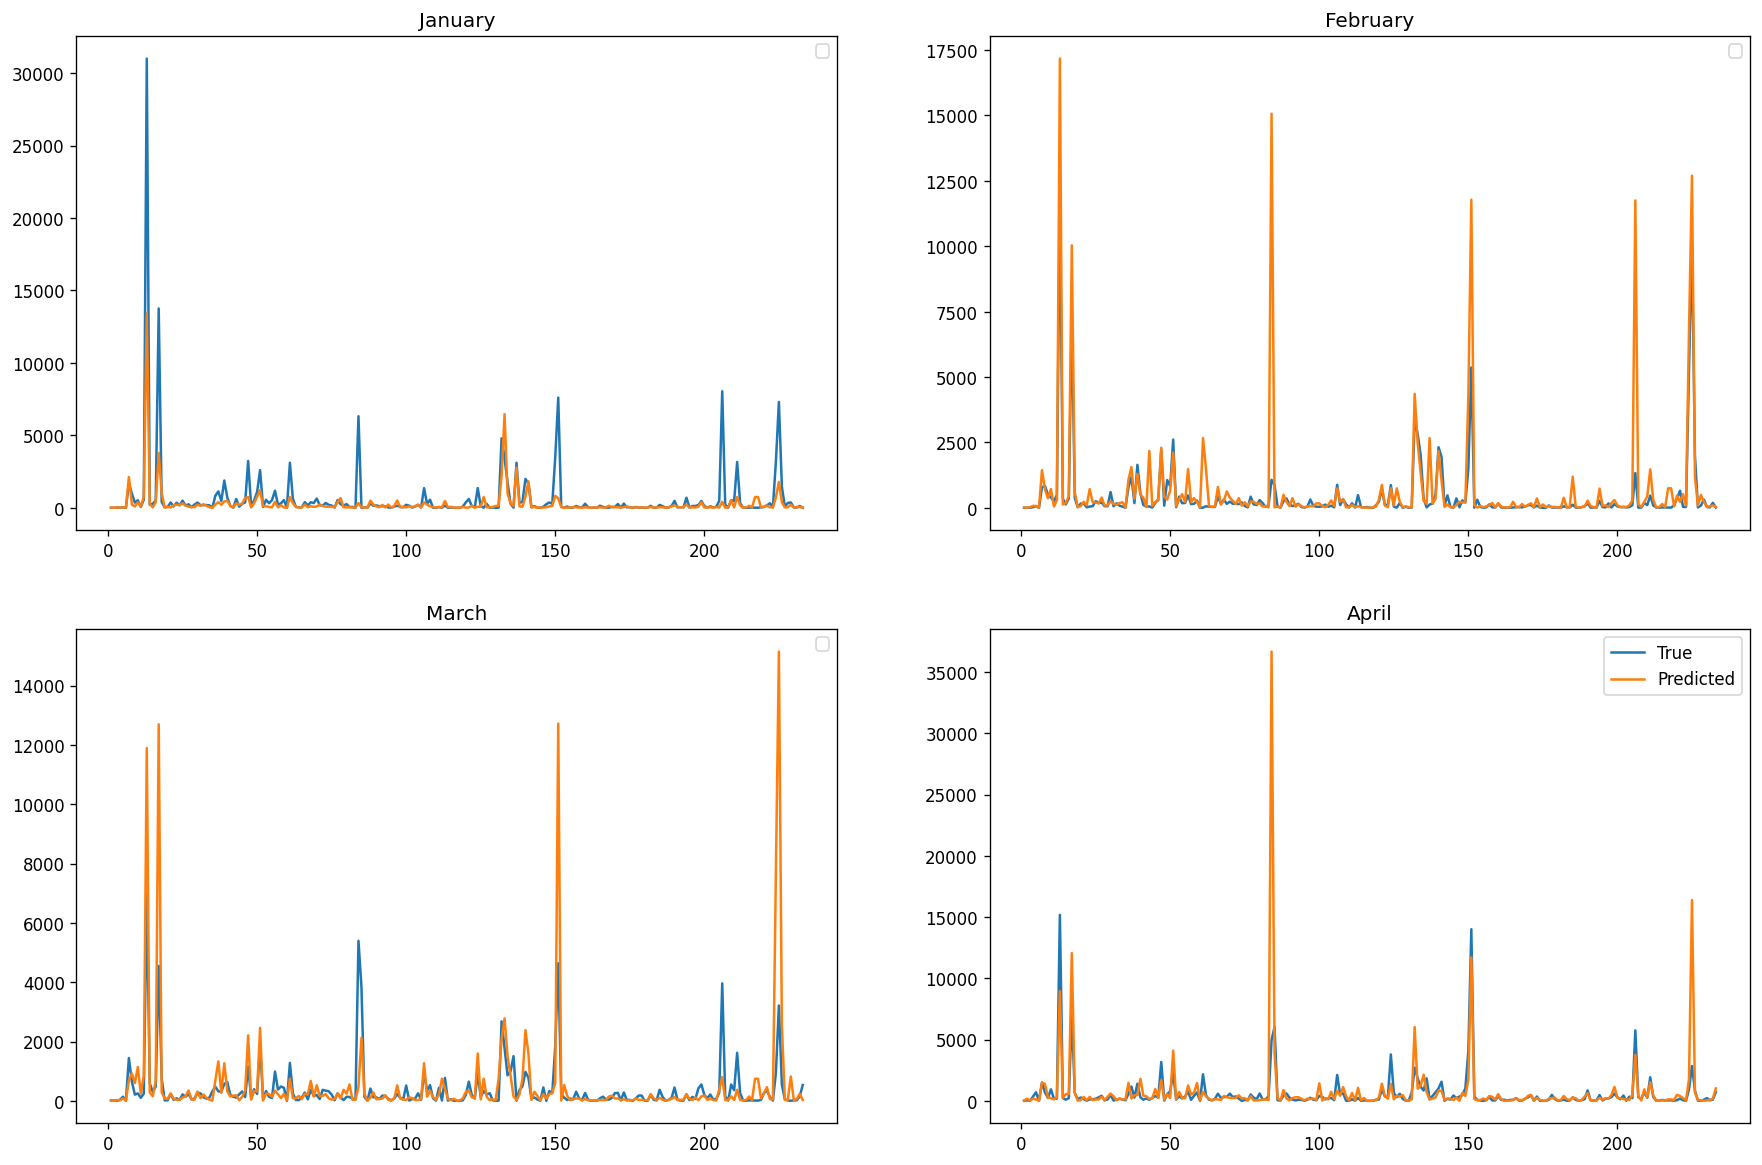

In [ ]:
plt.figure(figsize = (18,12))
plt.subplot(2,2,1)
plt.legend(['True','Predicted'])
plt.plot(test1['SKU id'],test1['sales next month'])
plt.plot(test1['SKU id'].values,test1['pred'].values)
plt.title('January')
plt.subplot(2,2,2)
plt.legend(['True','Predicted'])
plt.plot(test1['SKU id'],test2['sales next month'])
plt.plot(test1['SKU id'],test2['pred'])
plt.title('February')
plt.subplot(2,2,3)
plt.legend(['True','Predicted'])
plt.plot(test3['SKU id'],test3['sales next month'])
plt.plot(test3['SKU id'],test3['pred'])
plt.title('March')
plt.subplot(2,2,4)
plt.legend(['True','Predicted'])
plt.plot(test4['SKU id'],test4['sales next month'])
plt.plot(test4['SKU id'],test4['pred'])
plt.title('April')
plt.legend(['True','Predicted'])

In [ ]:
dataw1_valid

,index,Warehouse id,Region,SKU id,Dates,Fans,sales next month,diff sales,rolling mean sales,isFest,isSum,isWin,pred
0,7223,Wh-1,NORTH,1,2020-11-01,8,8.0,NaN,NaN,1,0,1,13.846256
1398,8621,Wh-1,NORTH,1,2021-05-01,12,NaN,4.0,11.6,0,1,0,24.852083
233,7456,Wh-1,NORTH,1,2020-12-01,8,8.0,0.0,NaN,1,0,1,13.846256
932,8155,Wh-1,NORTH,1,2021-03-01,16,8.0,2.0,10.8,1,0,0,18.312626
699,7922,Wh-1,NORTH,1,2021-02-01,14,16.0,6.0,NaN,0,0,1,27.079279
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,7688,Wh-1,NORTH,233,2020-12-01,12,11.0,1.0,NaN,1,0,1,38.206156
1397,8620,Wh-1,NORTH,233,2021-04-01,425,57.0,-293.0,340.4,0,1,0,655.491333
232,7455,Wh-1,NORTH,233,2020-11-01,11,12.0,NaN,NaN,1,0,1,29.920550
698,7921,Wh-1,NORTH,233,2021-01-01,11,536.0,-1.0,NaN,1,0,1,29.920550


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier() 

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
# check xgboost version
import xgboost as xgb
rgr = xgb.XGBRFRegressor()
Xtr = imputer.fit_transform(dataw1_train[features])
ytr = dataw1_train['sales next month']
rgr = rgr.fit(Xtr,ytr)

[15:52:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
Xval= imputer.transform(dataw1_valid[features])
yval= dataw1_valid["sales next month"]
print(type(yval))
predic = rgr.predict(Xval)
print(mape(predic, yval))

<class 'pandas.core.series.Series'>
7.875170629801246


In [ ]:
dataw1_valid['predadaboost'] = predic


In [ ]:
test1 = dataw1_valid[dataw1_valid['Dates'] == '2020-11-01']
test2 = dataw1_valid[dataw1_valid['Dates'] == '2020-12-01']
test3 = dataw1_valid[dataw1_valid['Dates'] == '2021-01-01']
test4 = dataw1_valid[dataw1_valid['Dates'] == '2021-02-01']
test5 = dataw1_valid[dataw1_valid['Dates'] == '2021-03-01']
test6 = dataw1_valid[dataw1_valid['Dates'] == '2021-04-01']
test7 = dataw1_valid[dataw1_valid['Dates'] == '2021-05-01']
test1.reset_index(inplace = True)
test2.reset_index(inplace = True)
test3.reset_index(inplace = True)
test4.reset_index(inplace = True)
test5.reset_index(inplace = True)
test6.reset_index(inplace = True)
test7.reset_index(inplace = True)

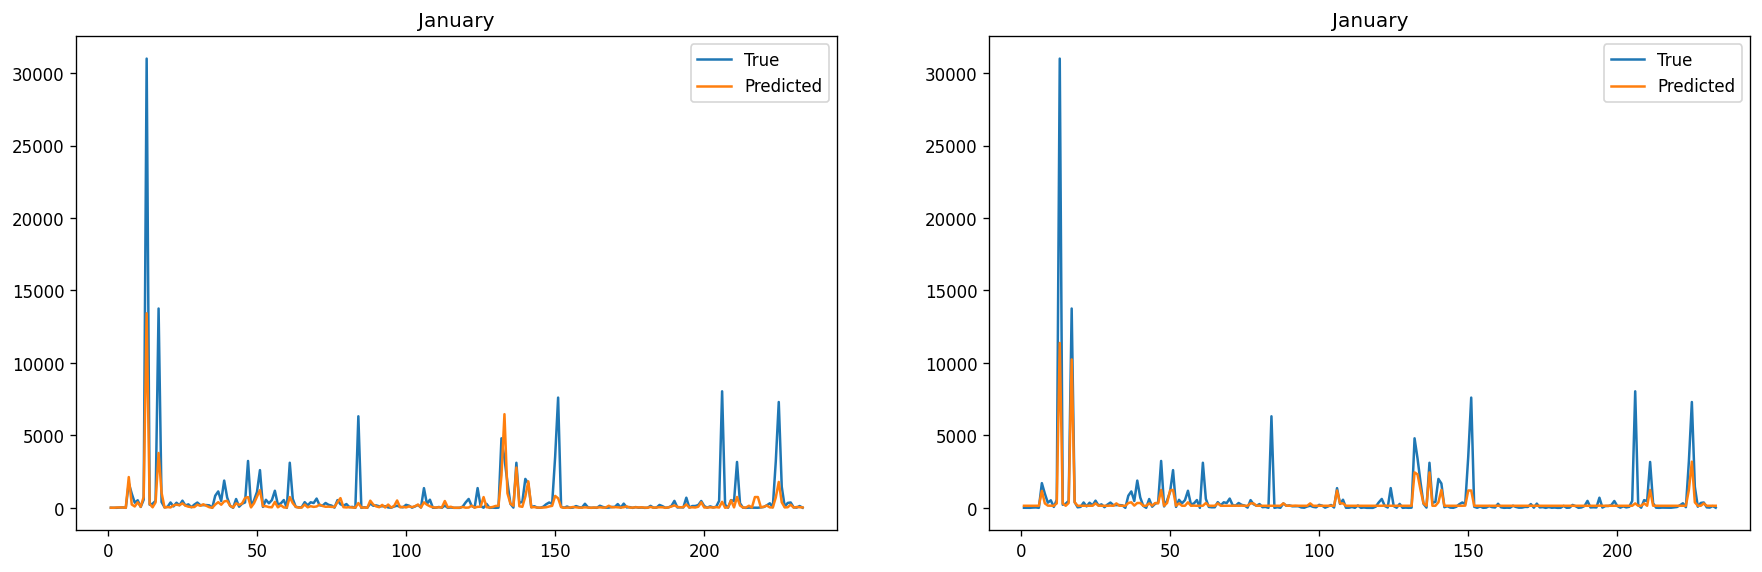

In [ ]:
plt.figure(figsize = (18,12))
plt.subplot(2,2,1)
plt.plot(test1['SKU id'],test1['sales next month'])
plt.plot(test1['SKU id'].values,test1['pred'].values)
plt.title('January')
plt.legend(['True','Predicted'])
plt.subplot(2,2,2)
plt.plot(test1['SKU id'],test1['sales next month'])
plt.plot(test1['SKU id'].values,test1['predadaboost'].values)
plt.title('January')
plt.legend(['True','Predicted'])

In [ ]:
dataw1_valid

,index,Warehouse id,Region,SKU id,Dates,Fans,sales next month,diff sales,rolling mean sales,isFest,isSum,isWin,pred,predadaboost
0,7223,Wh-1,NORTH,1,2020-11-01,8,8.0,NaN,NaN,1,0,1,13.846256,145.746872
1398,8621,Wh-1,NORTH,1,2021-05-01,12,NaN,4.0,11.6,0,1,0,24.852083,113.463196
233,7456,Wh-1,NORTH,1,2020-12-01,8,8.0,0.0,NaN,1,0,1,13.846256,145.746872
932,8155,Wh-1,NORTH,1,2021-03-01,16,8.0,2.0,10.8,1,0,0,18.312626,99.529465
699,7922,Wh-1,NORTH,1,2021-02-01,14,16.0,6.0,NaN,0,0,1,27.079279,156.876389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,7688,Wh-1,NORTH,233,2020-12-01,12,11.0,1.0,NaN,1,0,1,38.206156,145.746872
1397,8620,Wh-1,NORTH,233,2021-04-01,425,57.0,-293.0,340.4,0,1,0,655.491333,303.517517
232,7455,Wh-1,NORTH,233,2020-11-01,11,12.0,NaN,NaN,1,0,1,29.920550,145.746872
698,7921,Wh-1,NORTH,233,2021-01-01,11,536.0,-1.0,NaN,1,0,1,29.920550,145.746872


In [ ]:
!pip install pmdarima

In [ ]:
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
import pmdarima as pm

In [ ]:
dataw1


,Warehouse id,Region,SKU id,Dates,Fans,sales next month
0,Wh-1,NORTH,SKU-1,2018-04-01,27,13.0
1,Wh-1,NORTH,SKU-2,2018-04-01,88,28.0
2,Wh-1,NORTH,SKU-3,2018-04-01,6,6.0
3,Wh-1,NORTH,SKU-4,2018-04-01,162,184.0
4,Wh-1,NORTH,SKU-5,2018-04-01,171,402.0
...,...,...,...,...,...,...
8849,Wh-1,NORTH,SKU-229,2021-05-01,4,NaN
8850,Wh-1,NORTH,SKU-230,2021-05-01,13,NaN
8851,Wh-1,NORTH,SKU-231,2021-05-01,20,NaN
8852,Wh-1,NORTH,SKU-232,2021-05-01,15,NaN


In [ ]:

w1=dataw1.drop(labels=["Warehouse id","Region","sales next month"],axis=1)
w1=w1.loc[(w1['SKU id']=='SKU-1')]
w1=w1.drop(labels='SKU id',axis=1)
split_point = '2020-11-01'
w1_train = w1[w1['Dates'] < split_point].copy()
w1_valid = w1[w1['Dates'] >= split_point].copy()
w1_train.set_index('Dates',inplace=True)
w1_valid.set_index('Dates',inplace=True)
w1.set_index('Dates',inplace=True)


In [ ]:
order=(1,0,1)
model=ARIMA(endog=w1_train,order=order)
fit=model.fit()
# fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
fit.forecast(7).iloc[-1]

13.28912134577023

In [ ]:
mapes = []

In [ ]:
preds=[]

In [ ]:
w1=dataw1.drop(labels=["Warehouse id","Region","sales next month"],axis=1)

In [ ]:
w1=w1.loc[(w1['SKU id']==f'SKU-{str(i)}')]
w1=w1.drop(labels='SKU id',axis=1)

In [ ]:
w1

,Dates,Fans
232,2018-04-01,91
465,2018-05-01,31
698,2018-06-01,114
931,2018-07-01,51
1164,2018-08-01,21
1397,2018-09-01,33
1630,2018-10-01,33
1863,2018-11-01,13
2096,2018-12-01,11
2329,2019-01-01,29


In [ ]:
mapes = []
for i in range(1, 234):
  w1=dataw1.drop(labels=["Warehouse id","Region","sales next month"],axis=1)
  w1=w1.loc[(w1['SKU id']==f'SKU-{str(i)}')]
  w1=w1.drop(labels='SKU id',axis=1)
  split_point = '2020-11-01'
  w1_train = w1[w1['Dates'] < split_point].copy()
  w1_valid = w1[w1['Dates'] >= split_point].copy()
  w1_train.set_index('Dates',inplace=True)
  w1_valid.set_index('Dates',inplace=True)
  w1.set_index('Dates',inplace=True)
  order=(1,0,1)
  seasonal_order=(0,1,0,12)
  model=ARIMA(endog=w1_train,order=order,seasonal_order=seasonal_order)
  fit=model.fit()
  predi=pd.Series(fit.forecast(len(w1_valid)))
  predi=predi.map(lambda x: x if x>=0 else 0)
  # print(predi)
  actuals=w1_valid["Fans"]
  mapes.append(mape(predi,actuals))
print(np.array(mapes).mean())
  # fit.summary()
  #preds.append(fit.forecast(7).iloc[-1])
  # print(mape(fit.forecast(7).values, w1_valid['Fans'].values))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

3.392458322084492


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
print(np.array(mapes).mean())

3.392458322084492


In [ ]:
len(mapes)

0

In [ ]:
result=adfuller(w1_train)
print(result[0])
print(result[1])

-5.018774153895183
2.0370728169998616e-05


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


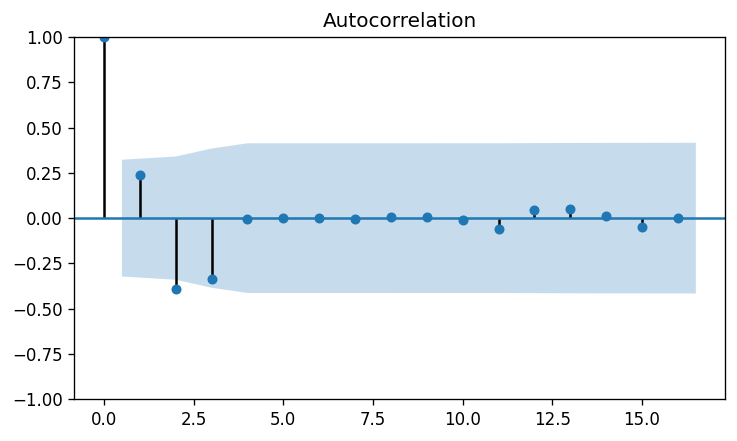

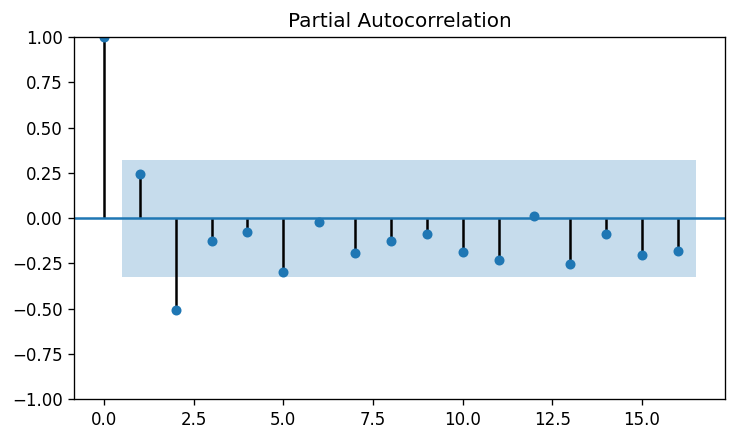

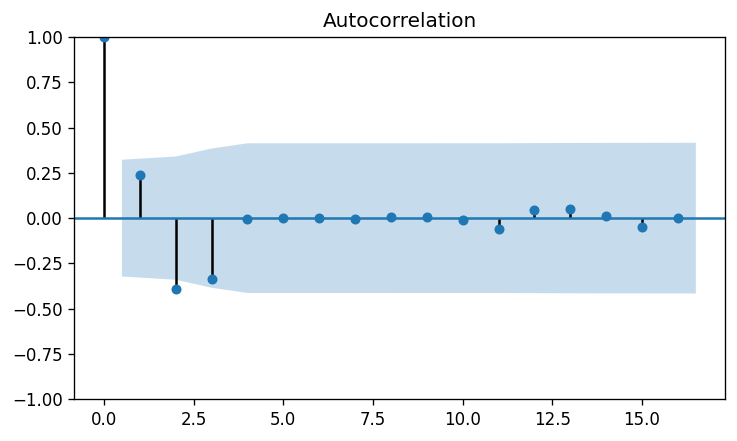

In [ ]:
plt.rcParams.update({'figure.figsize':(7,4),'figure.dpi':120})
plot_pacf(w1.diff().dropna())
plot_acf(w1.diff().dropna())

In [ ]:
order=(1,0,1)
model=ARIMA(endog=w1_train,order=order)
fit=model.fit()
fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Fans   No. Observations:                   31
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -143.072
Date:                Thu, 10 Mar 2022   AIC                            294.144
Time:                        15:55:32   BIC                            299.880
Sample:                    04-01-2018   HQIC                           296.014
                         - 10-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.9824     17.163      1.747      0.081      -3.657      63.622
ar.L1          0.8658      0.216      4.003      0.000       0.442       1.290
ma.L1         -0.6321      0.407     -1.554      0.120      -1.429       0.165
sigma2       591.5084    209.183      2.828      0.005     181.517    1001.500
===================================================================================
Ljung-Box (L1) (Q):                   1.13   Jarque-Bera (JB):                27.73
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             1.90
Prob(H) (two-sided):                  0.29   Kurtosis:                         5.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predi=pd.Series(fit.forecast(len(w1_valid)))
predi=predi.map(lambda x: x if x>=0 else 0)
print(predi)
actuals=w1_valid["Fans"]
print(actuals)

2020-11-01    18.353423
2020-12-01    19.914147
2021-01-01    21.265407
2021-02-01    22.435315
2021-03-01    23.448209
2021-04-01    24.325163
2021-05-01    25.084421
Freq: MS, Name: predicted_mean, dtype: float64
Dates
2020-11-01     11
2020-12-01     12
2021-01-01     11
2021-02-01    536
2021-03-01    718
2021-04-01    425
2021-05-01     57
Name: Fans, dtype: int64


In [ ]:
w1_valid

,Fans
Dates,
2020-11-01,11
2020-12-01,12
2021-01-01,11
2021-02-01,536
2021-03-01,718
2021-04-01,425
2021-05-01,57


In [ ]:
fit.forecast(7)

2020-11-01    18.353423
2020-12-01    19.914147
2021-01-01    21.265407
2021-02-01    22.435315
2021-03-01    23.448209
2021-04-01    24.325163
2021-05-01    25.084421
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
mape(fit.forecast(7).values, w1_valid['Fans'].values)

0.8127708934549538

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(actuals,predi)

0.8127708934549538

In [ ]:
smodel = pm.auto_arima(w1_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=1, max_q=1, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=195.178, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=186.844, Time=0.09 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=186.324, Time=0.04 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=188.835, Time=0.25 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=inf, Time=0.05 sec
 ARIMA(1,2,0)(0,1,0)[12] intercept   : AIC=188.314, Time=0.08 sec

Best model:  ARIMA(1,2,0)(0,1,0)[12]          
Total fit time: 1.459 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   31
Model:             SARIMAX(1, 2, 0)x(0, 1, 0, 12)   Log Likelihood                 -91.162
Date:                            Thu, 10 Mar 2022   AIC                            186.324
Time:                                    15:53:41   BIC                            187.990
Sample:                                         0   HQIC                           186.489
                                             - 31                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7054      0.213     -3.307      0.001      -1.123      -0.287
sigma2      2562.6437   1272.291      2.014      0.044      69.000    5056.288
===================================================================================
Ljung-Box (L1) (Q):                   4.01   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.05   Prob(JB):                         0.94
Heteroskedasticity (H):               0.87   Skew:                            -0.04
Prob(H) (two-sided):                  0.87   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

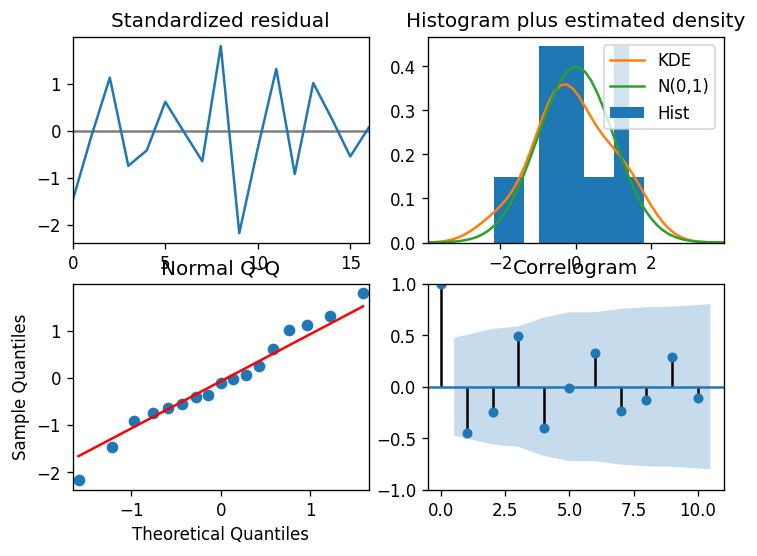

In [ ]:
smodel.plot_diagnostics(figsize=(7,5))
plt.show()

In [ ]:
# # Forecast
# n_periods = 6
# fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
# index_of_fc = np.arange(31,31 +n_periods)
# # make series for plotting purpose
# fitted_series = pd.Series(fitted, index=index_of_fc)
# lower_series = pd.Series(confint[:, 0], index=index_of_fc)
# upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# # Plot
# plt.plot(w1_train)
# plt.plot(fitted_series, color='darkgreen')
# plt.fill_between(lower_series.index, 
#                  lower_series, 
#                  upper_series, 
#                  color='k', alpha=.15)

# plt.title("m")
# plt.show()

In [ ]:
pre=smodel.predict(7)

In [ ]:
pre
actuals=w1_valid["Fans"]
print(actuals)

Dates
2020-11-01     11
2020-12-01     12
2021-01-01     11
2021-02-01    536
2021-03-01    718
2021-04-01    425
2021-05-01     57
Name: Fans, dtype: int64


In [ ]:
mean_absolute_percentage_error(actuals,pre)

0.6620587187082918

In [ ]:
df = data.drop(['Warehouse id', 'Region', 'SKU id'], axis = 1)
df

,Apr-18,May-18,Jun-18,Jul-18,Aug-18,Sep-18,Oct-18,Nov-18,Dec-18,Jan-19,...,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21
0,27,13,30,14,22,8,8,8,8,8,...,12,8,8,8,8,8,14,16,8,12
1,88,28,127,130,58,10,7,7,7,13,...,16,7,7,7,7,7,13,43,13,43
2,6,6,6,6,6,6,6,6,6,6,...,8,6,6,6,6,6,6,8,26,6
3,162,184,110,172,90,40,18,26,18,66,...,82,78,38,18,22,28,36,352,58,18
4,171,402,627,615,300,417,141,42,72,33,...,468,216,75,6,30,66,141,699,183,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,7,7,7,7,7,7,7,7,7,7,...,591,167,455,215,135,239,295,7,7,135
1035,49,25,41,13,21,53,33,21,67,21,...,9,9,21,133,9,33,9,103,49,9
1036,21,13,13,21,29,21,21,29,13,13,...,13,13,13,13,13,21,13,13,13,13
1037,15,13,13,11,9,11,36,15,21,15,...,9,9,17,13,11,36,21,17,9,9


In [ ]:
d = pd.DataFrame(df.iloc[0]).reset_index()
d.columns = ['ds', 'y']
d

,ds,y
0,Apr-18,27
1,May-18,13
2,Jun-18,30
3,Jul-18,14
4,Aug-18,22
5,Sep-18,8
6,Oct-18,8
7,Nov-18,8
8,Dec-18,8
9,Jan-19,8


In [ ]:
split_pt = '2020-12-01'
d_tr=d[d['ds'] <= split_pt]
d_ts=d[d['ds'] > split_pt]
print(type(d_tr))
d_tr

<class 'pandas.core.frame.DataFrame'>


,ds,y


In [ ]:
june_pred=[]
for i in range(len(df)):
  d = pd.DataFrame(df.iloc[i]).reset_index()
  d.columns = ['ds', 'y']
  order=(1,0,1)
  seasonal_order=(0,1,0,12)
  model=ARIMA(endog=d_tr,order=order,seasonal_order=seasonal_order)
  fit=model.fit()
  predi=pd.Series(fit.forecast(len(d_ts)))
  predi=predi.map(lambda x: x if x>=0 else 0)
  # print(predi)
  actuals=d_ts['y']
  mapes.append(mape(predi,actuals))
print(np.array(mapes).mean())

ValueError: ignored